In [1]:
## importing needed library
import pandas as pd
import numpy as np
# loading in dataset from excel
elastic_prop = pd.read_excel("elastic Hole A logs.xlsx")

In [2]:
#displaying loaded dataset
elastic_prop

,depth,Gamma,Density,vp,Vs,shear_modulus,poisson_ratio,young_modulus,real_labels_A,formations,...,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27
0,161.02,45.0744,2.632998,5795.981453,3695.036335,3.594909e+07,0.157642,8.323239e+07,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,161.07,47.9752,2.648486,5783.318340,3701.418877,3.628559e+07,0.153086,8.368083e+07,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,161.12,49.2025,2.678836,5798.969072,3680.981595,3.629722e+07,0.162582,8.439702e+07,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,161.17,52.2893,2.632898,5769.230769,3671.970624,3.550033e+07,0.159522,8.232685e+07,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,161.22,59.3182,2.672184,5742.725881,3671.521234,3.602122e+07,0.154337,8.316123e+07,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13079,815.57,59.7361,2.629264,5804.055100,3811.944091,3.820562e+07,0.120724,8.563593e+07,0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13080,815.62,58.4438,2.639210,5810.350170,3792.667509,3.796326e+07,0.128808,8.570644e+07,0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13081,815.67,61.1281,2.685878,5832.944470,3769.317753,3.816030e+07,0.141499,8.711986e+07,0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13082,815.72,68.6226,2.697876,5886.970173,3768.844221,3.832113e+07,0.152747,8.834917e+07,0,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
#extracting required logs dataset columns as x
features = ['Gamma', 'Density', 'vp', 'Vs']
x_features = elastic_prop.loc[:, features]

In [4]:
x_features #displaying extracted log dataset

,Gamma,Density,vp,Vs
0,45.0744,2.632998,5795.981453,3695.036335
1,47.9752,2.648486,5783.318340,3701.418877
2,49.2025,2.678836,5798.969072,3680.981595
3,52.2893,2.632898,5769.230769,3671.970624
4,59.3182,2.672184,5742.725881,3671.521234
...,...,...,...,...
13079,59.7361,2.629264,5804.055100,3811.944091
13080,58.4438,2.639210,5810.350170,3792.667509
13081,61.1281,2.685878,5832.944470,3769.317753
13082,68.6226,2.697876,5886.970173,3768.844221


In [5]:
#extracting x data values
x_features = x_features.values
x_features

array([[4.50744000e+01, 2.63299800e+00, 5.79598145e+03, 3.69503633e+03],
       [4.79752000e+01, 2.64848600e+00, 5.78331834e+03, 3.70141888e+03],
       [4.92025000e+01, 2.67883600e+00, 5.79896907e+03, 3.68098160e+03],
       ...,
       [6.11281000e+01, 2.68587800e+00, 5.83294447e+03, 3.76931775e+03],
       [6.86226000e+01, 2.69787600e+00, 5.88697017e+03, 3.76884422e+03],
       [7.79380000e+01, 2.72520400e+00, 5.91575958e+03, 3.75469337e+03]])

In [6]:
#extracting lithology log as y dataset
labels_y = elastic_prop.formations
labels_y 

0        0
1        0
2        0
3        0
4        0
        ..
13079    6
13080    6
13081    6
13082    6
13083    6
Name: formations, Length: 13084, dtype: int64

In [7]:
#extracting y dataset values
labels = labels_y.values
labels

array([0, 0, 0, ..., 6, 6, 6], dtype=int64)

In [8]:
#importing necessary modules
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from matplotlib.colors import LinearSegmentedColormap, ListedColormap
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
#from kneed import KneeLocator
from sklearn.metrics import accuracy_score, classification_report, precision_recall_curve
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier

In [9]:
#spliting of x and y dataset into trainin and  testing sets in ration 80 : 20
logs_train, logs_test, labels_train, labels_test = train_test_split(x_features, labels, test_size = 0.2, random_state = 0)

In [10]:
#estimating the  size of training dataset
logs_train.shape

(10467, 4)

In [11]:
logs_train

array([[7.29771000e+01, 2.97047600e+00, 6.52173913e+03, 3.91185291e+03],
       [6.40352000e+01, 2.69294200e+00, 5.58867362e+03, 3.76506024e+03],
       [8.10864000e+01, 2.68901000e+00, 5.64334086e+03, 3.61838138e+03],
       ...,
       [1.03857000e+02, 2.72118000e+00, 5.77812018e+03, 3.76364321e+03],
       [5.65732000e+01, 2.83239200e+00, 5.74345884e+03, 3.79650721e+03],
       [7.11835000e+01, 2.68468800e+00, 5.71283484e+03, 3.67197062e+03]])

In [12]:
#estimating the size of testing dataset 
logs_test.shape

(2617, 4)

In [13]:
#standardizing training and testing datasets
scaler = StandardScaler()
logs_train_norm = scaler.fit_transform(logs_train) #scale data
logs_test_norm = scaler.transform(logs_test)

In [14]:
#importing needed modules
from sklearn.model_selection import validation_curve
import numpy as np
from sklearn.pipeline import  Pipeline
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [20]:
#hyperparameter optimization and tuning using gridserach and 10 fold cross validation methods
classifier = SVC(kernel = 'rbf', random_state = 0)
grid_parameter = [{'C': [10, 100, 1000, 10000, 100000, 1000000], 'gamma': [1, 2, 4, 6, 8, 10]}]
grid_search = GridSearchCV(estimator = classifier, param_grid = grid_parameter, scoring = 'accuracy', cv = 10, n_jobs = -1)

In [17]:
#stimating the highest performance accuracy score and optimal parameter values
svc_best_accuracy = grid_search.best_score_
svc_best_parameters = grid_search.best_params_

In [18]:
#showing the highest performance accuracy score and optimal parameter values
print('%.4f'%svc_best_accuracy)
print(svc_best_parameters)

0.8495
{'C': 10, 'gamma': 8}


In [15]:
#classifier = SVC(kernel = 'rbf', random_state = 0)
#grid_parameter_2 = [{'C': [100, 1000, 10000, 100000, 1000000], 'gamma': [1, 2, 4, 6, 8, 10]}]
#grid_search_2 = GridSearchCV(estimator = classifier, param_grid = grid_parameter_2, scoring = 'accuracy', cv = 10, n_jobs = -1)

In [16]:
#import time
#start = time.process_time()
#grid_search_2 = grid_search_2.fit(logs_train_norm, labels_train)
#end = time.process_time()
#print(end-start)

4.671875


In [17]:
#svc_best_accuracy_2 = grid_search_2.best_score_
#svc_best_parameters_2 = grid_search_2.best_params_

In [18]:
#print('%.4f'%svc_best_accuracy_2)
#print(svc_best_parameters_2)

0.8444
{'C': 100, 'gamma': 4}


In [15]:
#applying estimated optimal parameter values to retrain the support vector machines model, and estimate the time of training  
import time
start = time.process_time()
classifier = SVC(kernel= 'rbf', C = 10, gamma = 8, random_state = 0)
classifier.fit(logs_train_norm, labels_train)
scores = cross_val_score(estimator = classifier, X = logs_train_norm, y = labels_train, cv = 10)
end = time.process_time()
print(end-start)

23.125


In [16]:
#estimating svm predictions based on the training dataset
labels_train_pred = classifier.predict(logs_train_norm)

In [17]:
#estimating the accuracy of prediction based on the training dataset
accuracy_score(labels_train, labels_train_pred)

0.8908951944205599

In [18]:
#testing the generizability of SVM based on the reserved testing dataset.
labels_test_pred = classifier.predict(logs_test_norm)

In [19]:
#estimating the prediction performance accuracy based on the testing dataset
accuracy_score(labels_test, labels_test_pred)

0.8460068781047

In [25]:
#import time
#start = time.process_time()
#classifier_2 = SVC(kernel= 'rbf', C = 100, gamma = 4, random_state = 0)
#classifier_2.fit(logs_train_norm, labels_train)
#scores = cross_val_score(estimator = classifier_2, X = logs_train_norm, y = labels_train, cv = 10)
#end = time.process_time()
#print(end-start)

41.3125


In [26]:
#labels_train_pred_2 = classifier_2.predict(logs_train_norm)

In [27]:
#accuracy_score(labels_train, labels_train_pred_2)

0.8886022738129359

In [28]:
#labels_test_pred_2 = classifier_2.predict(logs_test_norm)

In [29]:
#accuracy_score(labels_test, labels_test_pred_2)

0.8429499426824608

In [30]:
#import time
#start = time.process_time()
#classifier_3 = SVC(kernel= 'rbf', C = 100, gamma = 1, random_state = 0)
#classifier_3.fit(logs_train_norm, labels_train)
#scores = cross_val_score(estimator = classifier_3, X = logs_train_norm, y = labels_train, cv = 10)
#end = time.process_time()
#print(end-start)

26.21875


In [31]:
#labels_train_pred_3 = classifier_3.predict(logs_train_norm)

In [32]:
#accuracy_score(labels_train, labels_train_pred_3)

0.8587943059138244

In [33]:
#labels_test_pred_3 = classifier_3.predict(logs_test_norm)

In [34]:
#accuracy_score(labels_test, labels_test_pred_3)

0.8482995796713795

In [35]:
#import time
#start = time.process_time()
#classifier_4 = SVC(kernel= 'rbf', C = 100, gamma = 0.1, random_state = 0)
#classifier_4.fit(logs_train_norm, labels_train)
#scores = cross_val_score(estimator = classifier_4, X = logs_train_norm, y = labels_train, cv = 10)
#end = time.process_time()
#print(end-start)

19.265625


In [36]:
#labels_train_pred_4 = classifier_4.predict(logs_train_norm)

In [37]:
#accuracy_score(labels_train, labels_train_pred_4)

0.8301327983185249

In [38]:
#labels_test_pred_4 = classifier_4.predict(logs_test_norm)

In [39]:
#accuracy_score(labels_test, labels_test_pred_4)

0.8242262132212457

In [40]:
#import time
#start = time.process_time()
#classifier_5 = SVC(kernel= 'rbf', C = 10, gamma = 1, random_state = 0)
#classifier_5.fit(logs_train_norm, labels_train)
#scores = cross_val_score(estimator = classifier_5, X = logs_train_norm, y = labels_train, cv = 10)
#end = time.process_time()
#print(end-start)

17.578125


In [41]:
#labels_train_pred_5 = classifier_5.predict(logs_train_norm)

In [42]:
#accuracy_score(labels_train, labels_train_pred_5)

0.8473297028757046

In [43]:
#labels_test_pred_5 = classifier_5.predict(logs_test_norm)

In [44]:
#accuracy_score(labels_test, labels_test_pred_5)

0.842185708826901

In [45]:
#import time
#start = time.process_time()
#classifier_6 = SVC(kernel= 'rbf', C = 1000, gamma = 8, random_state = 0)
#classifier_6.fit(logs_train_norm, labels_train)
#scores = cross_val_score(estimator = classifier_6, X = logs_train_norm, y = labels_train, cv = 10)
#end = time.process_time()
#print(end-start)

218.390625


In [46]:
#labels_train_pred_6 = classifier_6.predict(logs_train_norm)

In [47]:
#accuracy_score(labels_train, labels_train_pred_6)

0.9392376038979651

In [48]:
#labels_test_pred_6 = classifier_6.predict(logs_test_norm)

In [49]:
#accuracy_score(labels_test, labels_test_pred_6)

0.8112342376767291

In [50]:
#import time
#start = time.process_time()
#classifier_7 = SVC(kernel= 'rbf', C = 100, gamma = 8, random_state = 0)
#classifier_7.fit(logs_train_norm, labels_train)
#scores = cross_val_score(estimator = classifier_7, X = logs_train_norm, y = labels_train, cv = 10)
#end = time.process_time()
#print(end-start)

53.28125


In [51]:
#labels_train_pred_7 = classifier_7.predict(logs_train_norm)

In [52]:
#accuracy_score(labels_train, labels_train_pred_7)

0.9155440909525174

In [53]:
#labels_test_pred_7 = classifier_7.predict(logs_test_norm)

In [54]:
#accuracy_score(labels_test, labels_test_pred_7)

0.8295758502101643

In [16]:
#importing functions to plot figures
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [17]:
#estimating performaning accuracy for each vaired values of parameter C
#x = x_train_norm
#y =  y_train
k_c = [10, 100, 1000, 10000, 100000, 1000000]
n_score_c = []
# loop through range  values f n_stimators
for x_c in k_c:
    #mpement  RandomForestClassifier with n_estimators
    classifier_score = SVC(C = x_c, gamma = 8, random_state = 0)
    classifier_score.fit(logs_train_norm, labels_train)
    #derive cross_val_score for RandomForestClassifier with n_estimators
    scores_c = cross_val_score(estimator = classifier_score, X = logs_train_norm, y = labels_train, cv = 10)
    #add man of scores for n_estmators to n_score list
    n_score_c.append(scores_c.mean())
print( n_score_c)
print(scores_c.mean())

[0.8495294760044633, 0.8326173661978775, 0.8179035612996068, 0.7914394400097885, 0.7852314086865688, 0.7775887037716794]
0.7775887037716794


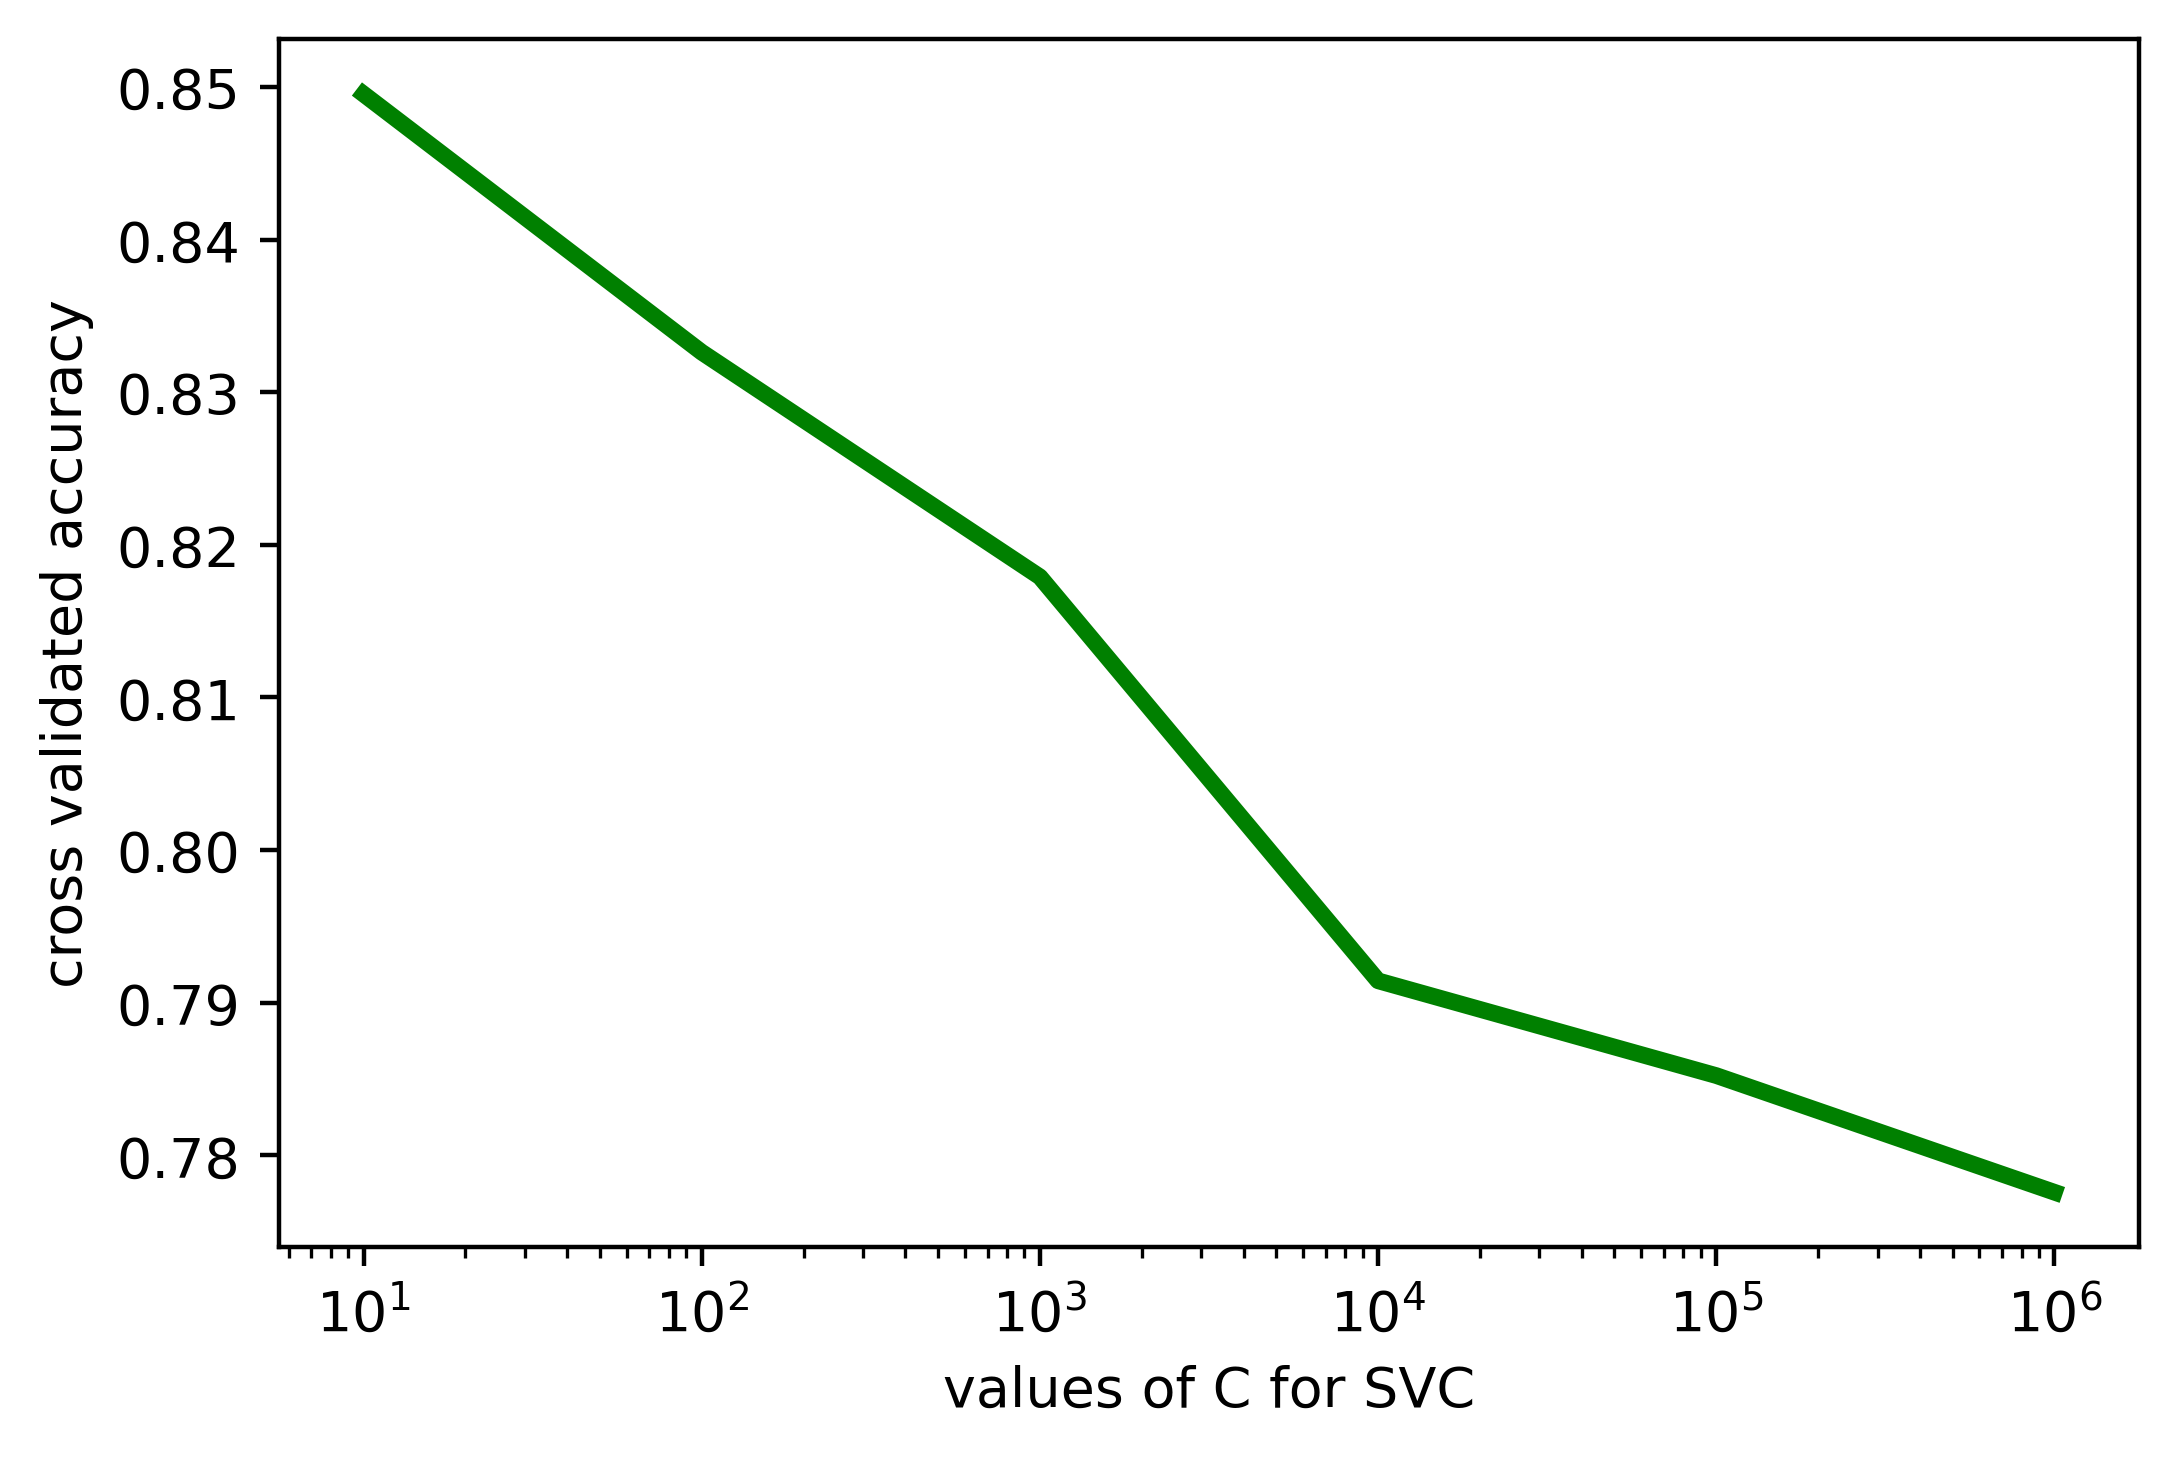

In [18]:
#plot the vaired values of C for SVMClassifier (x-axis) versus the cross validated accuracy (y-axis)
#x = [0.01,10, 15, 20, 25]
#y = [0.939, 0.942, 0.941,  0.941, 0.941, 0.943, 0.94, 1., 0.960]
plt.figure(figsize = (6, 4), dpi = 400)
plt.plot(k_c, n_score_c, linewidth = 3, color = 'green')
plt.xlabel('values of C for SVC')
plt.ylabel('cross validated accuracy')
#plt.ylim(0.938, 0.943) 
#plt.xlim(5, 25)
plt.xscale('log')
plt.savefig('desktop/SVM_c_values.svg', format = 'svg', dpi = 600)
plt.show()

In [19]:
#estimating performance accuracy for each vaired value of hyperparameter Gamma
#x = x_train_norm
#y =  y_train
k_c = [1, 2, 4, 6, 8, 10]
n_score_c = []
# loop through range  values f n_stimators
for x_c in k_c:
    #mpement  RandomForestClassifier with n_estimators
    classifier_score = SVC(C = 10, gamma = x_c, random_state = 0)
    classifier_score.fit(logs_train_norm, labels_train)
    #derive cross_val_score for RandomForestClassifier with n_estimators
    scores_c = cross_val_score(estimator = classifier_score, X = logs_train_norm, y = labels_train, cv = 10)
    #add man of scores for n_estmators to n_score list
    n_score_c.append(scores_c.mean())
print( n_score_c)
print(scores_c.mean())

[0.8374898873408683, 0.8417897991347398, 0.8464715722422802, 0.8495289281403118, 0.8495294760044633, 0.8473312624068402]
0.8473312624068402


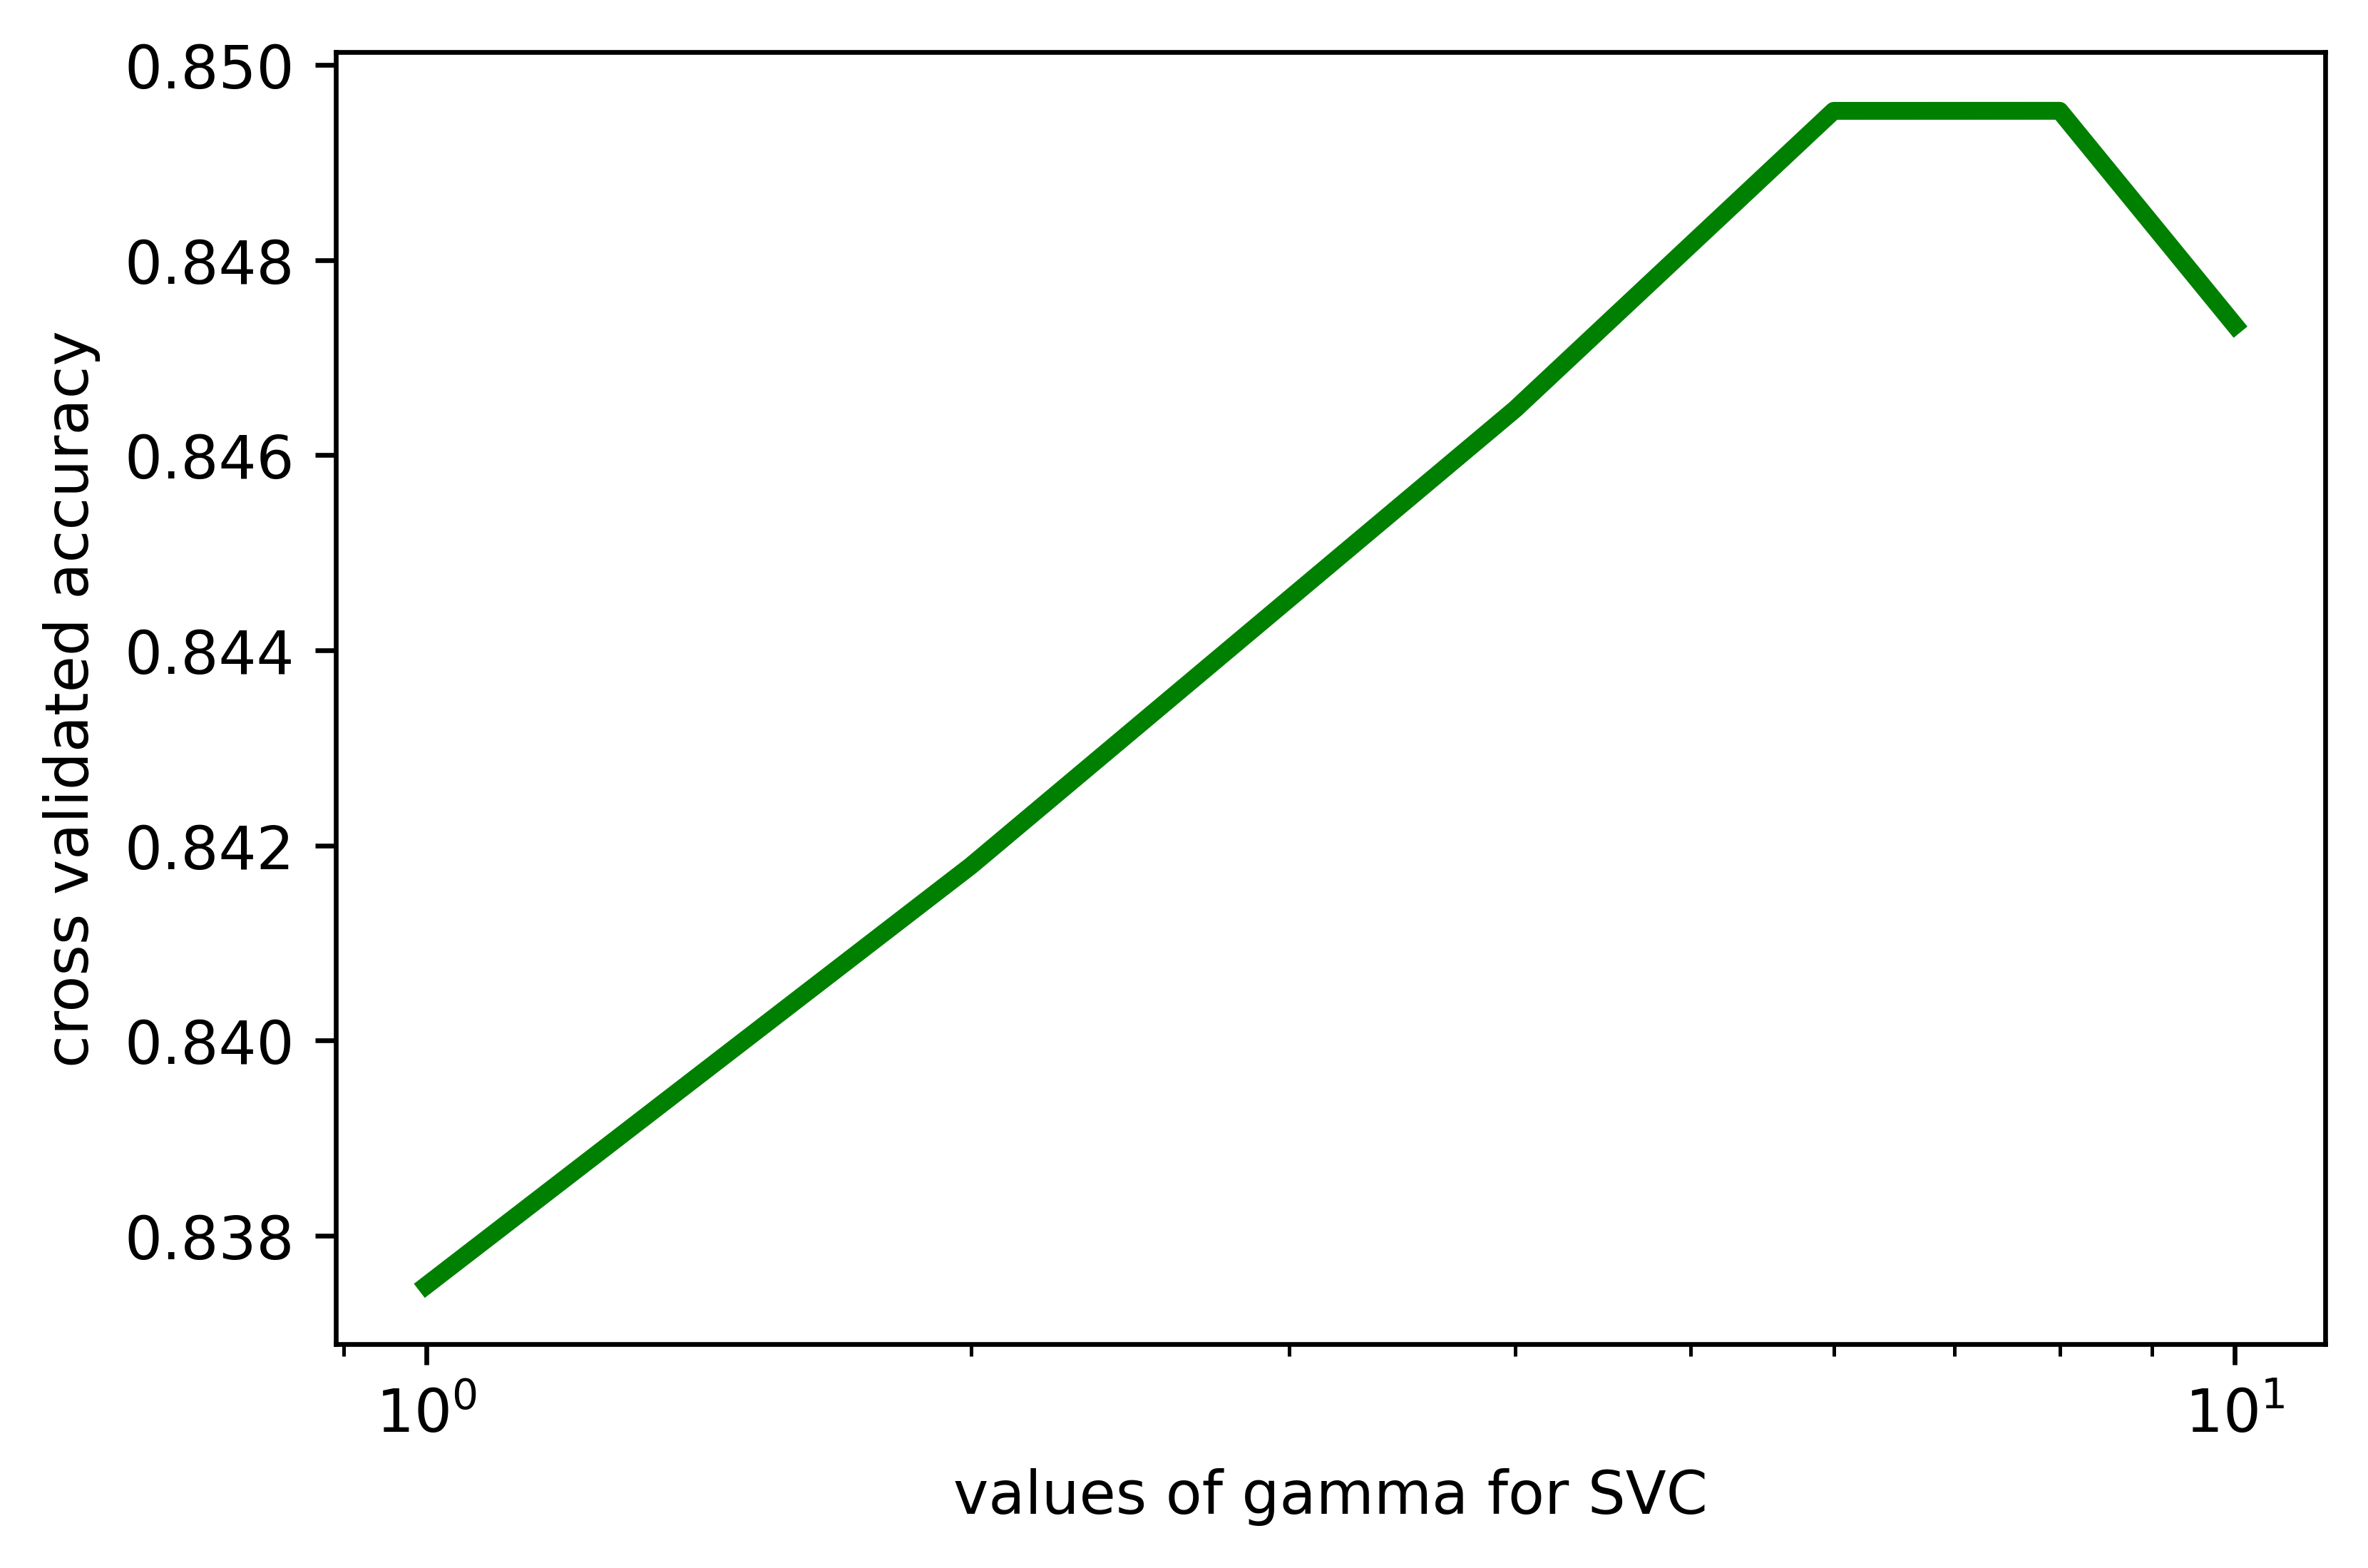

In [20]:
#plot the value of Gamma for SVMClassifier (x-axis) versus the cross validated accuracy (y-axis)
#x = [0.01,10, 15, 20, 25]
#y = [0.939, 0.942, 0.941,  0.941, 0.941, 0.943, 0.94, 1., 0.960]
plt.figure(figsize = (6, 4), dpi = 600)
plt.plot(k_c, n_score_c, linewidth = 3, color = 'green')
plt.xlabel('values of gamma for SVC')
plt.ylabel('cross validated accuracy')
#plt.ylim(0.938, 0.943) 
#plt.xlim(5, 25)
plt.xscale('log')
plt.savefig('desktop/SVM_g_values.svg', format = 'svg', dpi = 600)
plt.show()

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [21]:
#import matplotlib.pyplot as plt
#from matplotlib.pyplot import figure

In [22]:
#importing the confusion matric module
from sklearn.metrics import confusion_matrix # n_estimator 80
import itertools

In [41]:
#computing confusion matrix for SVM classifier based on the testing dataset
cm = pd.DataFrame(confusion_matrix(labels_test, labels_test_pred), index = ['Upper Roodeport Quartzite', 'Lower Roodeport Siltstone', 'Lower Roodeport Intrusives', 'Lower Roodeport Quartzite', 'Crown basalt', 'Crown Intrusive', 'babrosco Quartzite', 'babrosco Intrusives'], columns = ['Upper Roodeport Quartzite', 'Lower Roodeport Siltstone', 'Lower Roodeport Intrusives', 'Lower Roodeport Quartzite', 'Crown basalt', 'Crown Intrusive', 'babrosco Quartzite', 'babrosco Intrusives'])
cm_norm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

C:\Users\Wits-User\AppData\Local\Temp\ipykernel_4744\3545513201.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cm_norm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]


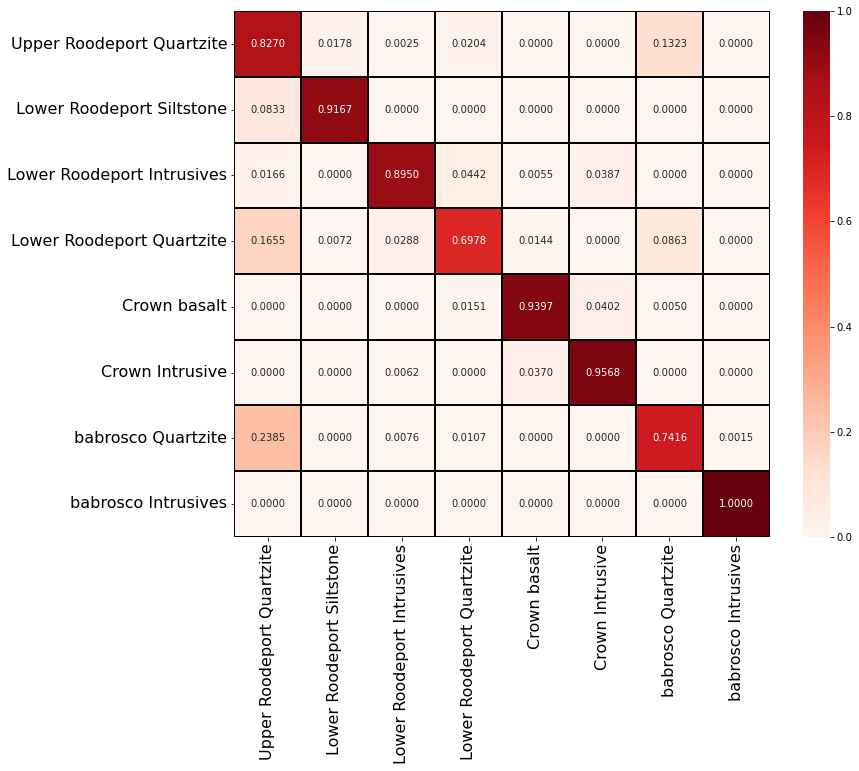

In [42]:
#plotting computed confusion matrix
plt.figure(figsize = (12, 10))
sns.heatmap(cm_norm, annot = True, fmt = '.4f', linewidth = 2, linecolor = 'black', cmap = 'Reds')
plt.subplots_adjust(bottom = 0.15)
#plt.set_xticks(tickmarks, minor = True)
plt.grid(True, which = 'minor', linestyle = '-')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
#ax.tick_params(axis = 'both', width = 4, lenght = 4)
plt.savefig('desktop/used_strat_svm__matrix.svg', format = 'svg', dpi = 600)

In [23]:
cm = pd.DataFrame(confusion_matrix(labels_test, labels_test_pred))
cm_norm_2 = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]

C:\Users\Obehi\AppData\Local\Temp\ipykernel_2992\3927785047.py:2: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  cm_norm_2 = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis]


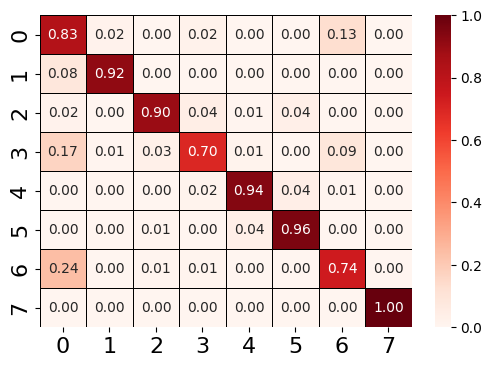

In [27]:
plt.figure(figsize = (6, 4))
sns.heatmap(cm_norm_2, annot = True, fmt = '.2f', linewidth = 0.5, linecolor = 'black', cmap = 'Reds')
plt.subplots_adjust(bottom = 0.1)
#plt.set_xticks(tickmarks, minor = True)
plt.grid(True, which = 'minor', linestyle = '-')
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
#ax.tick_params(axis = 'both', width = 4, lenght = 4)
plt.savefig('used_paper_A_svm_strat_matrix.svg', format = 'svg', dpi = 600)

In [36]:
#estimating evaluation metrics based on the training dataset
from sklearn.metrics import classification_report
print(classification_report(labels_train, labels_train_pred, digits = 4)) #n_esimatr 80% Test

              precision    recall  f1-score   support

           0     0.8342    0.8759    0.8546      3361
           1     0.9542    0.9618    0.9580       889
           2     0.9727    0.9344    0.9531       762
           3     0.8541    0.7675    0.8085       572
           4     0.9885    0.9814    0.9849       700
           5     0.9419    0.9662    0.9539       621
           6     0.8465    0.8122    0.8290      2519
           7     0.9952    0.9990    0.9971      1043

    accuracy                         0.8909     10467
   macro avg     0.9234    0.9123    0.9174     10467
weighted avg     0.8913    0.8909    0.8907     10467



In [37]:
#computing evaluation metrics based on the testing dataset
from sklearn.metrics import classification_report
print(classification_report(labels_test, labels_test_pred, digits = 4)) #n_esimatr 80% Test

              precision    recall  f1-score   support

           0     0.7647    0.8270    0.7946       786
           1     0.9296    0.9167    0.9231       216
           2     0.9310    0.8950    0.9127       181
           3     0.7405    0.6978    0.7185       139
           4     0.9541    0.9397    0.9468       199
           5     0.9118    0.9568    0.9337       162
           6     0.8056    0.7416    0.7723       654
           7     0.9964    1.0000    0.9982       280

    accuracy                         0.8460      2617
   macro avg     0.8792    0.8718    0.8750      2617
weighted avg     0.8471    0.8460    0.8457      2617



In [38]:
#creating a dataframe of the testing and predicted lithologies
df = pd.DataFrame({'true': labels_test, 'prediction':labels_test_pred})

In [39]:
df

,true,prediction
0,5,5
1,0,0
2,0,0
3,3,3
4,5,5
...,...,...
2612,0,0
2613,4,4
2614,4,4
2615,5,5


In [40]:
#writing to excel
from pandas import ExcelWriter
pred_stra_svm= pd.ExcelWriter('Desktop\pred_stra_svm.xlsx')
df.to_excel(pred_stra_svm)
pred_stra_svm.save()

In [4]:
a_strata_svm_predictn = pd.read_excel("a_pred_stra_svm.xlsx")

In [5]:
a_strata_svm_predictn 

,number,true,prediction
0,7959,5,5
1,2070,0,0
2,1453,0,0
3,6308,3,3
4,7985,5,5
...,...,...,...
2612,773,0,0
2613,8175,4,4
2614,7276,4,4
2615,7683,5,5


In [6]:
a_strata_svm_predictn = a_strata_svm_predictn.sort_values('number', axis = 0, ascending = True) 

In [7]:
a_strata_svm_predictn 

,number,true,prediction
1401,14,0,0
1048,16,0,0
599,18,0,0
2103,32,0,0
385,33,0,0
...,...,...,...
1864,13069,6,6
2299,13070,6,6
2199,13072,6,6
911,13079,6,6


In [14]:
from pandas import ExcelWriter
strata_a_svm_predictn = pd.ExcelWriter('desktop\strata_a_svm_predictn.xlsx')
a_strata_svm_predictn.to_excel(strata_a_svm_predictn)
strata_a_svm_predictn.save()